## Problem description

Predict the price of flat in Wurzbrug based on its size (in sqm) and time since last renovation (in yrs).

* input: $\mathbf{x} \in \mathbb{R}^2$, each example $\mathbf{x}$ consists of 2 features
* output: $y \in \mathbb{R}$, single output (price)
* Thus the dataset matrix = $\mathbf{X} \in \mathbb{R}^{x \times 2}$

In [98]:
# import torch
# --- YOUR CODE HERE ---
import torch
import random
from matplotlib import pyplot as plt
%matplotlib inline

### Generate synthetic data

Generate some data which are a bit similar to reality:

* sizes from normal distribution with mean 70 and std 20
* years from normal distribution with mean 5 and std 2
* clamp the input data into reasonable values (e.g. sizes btw $[20, 150]$, years btw $[0, 10]$)

In [99]:
# Fix number of data examples (e.g. to 1000)
# --- YOUR CODE HERE ---
num_samples = 1000

# generate random input data
# --- YOUR CODE HERE ---
sizes = torch.normal(mean=70, std=20, size=(num_samples, 1))
years = torch.normal(mean=5, std=2, size=(num_samples, 1))

sizes = torch.clamp(sizes, min=20, max=150)
years = torch.clamp(years, min=0, max=10)

# make sure the inputs are a single tensor with 2 colums
# --- YOUR CODE HERE ---
features = torch.cat((sizes, years),dim=1)
features.shape

torch.Size([1000, 2])

### Generate synthetic labels

We are working with liner model so assume labels are generated as $y = \mathbf{x}^T \mathbf{w} + b + e$, where $e$ is random gaussian noise.

Fix true parameters to the following values:

* weight for size = 10.
* weight for years = -20.
* bias = 100
* random noise is Gaussian with mean 0. and standard deviation 5.

In [115]:
# fix true parameters for the linear regression
true_w = torch.tensor([10.0, -20.0])

# bias
true_b = 100.0

#noise
noise = torch.normal(mean=0, std=5, size=labels.shape)

# generate outputs from linear regression model y = x^T w + b + e
labels = torch.matmul(features, true_w) + true_b + noise
labels = labels.reshape((-1, 1))
labels

tensor([[ 692.6934],
        [1072.4030],
        [ 530.9484],
        ...,
        [ 678.9172],
        [ 933.4548],
        [ 620.8697]])

### Plot data

Use matplotlib library to plot a scatter graph of price against the size of the apartment

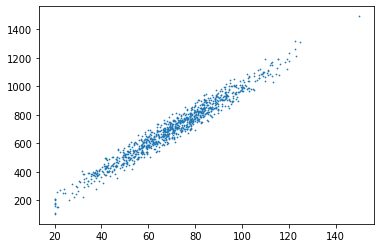

In [101]:
# use matplilib to plot a scatter of price against the size
# --- YOUR CODE HERE ---
plt.scatter(sizes.detach().numpy(), labels.detach().numpy(), .5) # detach tensor graphs and convert to ndarray

### Data loading

Write a generator to load batches of data. It shall recieve as arguments the data inputs, outputs and the batch size and yield a batch of examples at every call, where batch is a tuple of inputs and outputs in the batch. Remember to shuffle the data at the initiation of the generator so that you do not get always the same batches.

- iterator: Iterates over a list
- generator: Generates a list

- *param*: inputs, outputs, batch_size
- *yield*: batch (inputs, outputs)


- range: 
- - start: Starting number of the sequence.
- - stop: Generate numbers up to, but not including this number.
- - step: Difference between each number in the sequence.


- min:
- - return the lowest number of an iterable

In [102]:
# define a function (generator) iter_data(inputs, outputs, batch_size) -> (batch_inputs, batch_outputs)
# --- YOUR CODE HERE ---
import random

def generator(features, labels, batch_size):
    num_examples = len(features) # just assign lenght of our input to a variable
    indices = list(range(num_examples)) # create a list of indices with respect to the number of examples (0,1,...,999)
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size): # with batch_size 10 -> i=0, i=10, i=20, ... i=990
        # define range of batch
        # with batch_size 10 & num_examples 1000 
            # (0 + 10, 1000) = 10, (10 + 10, 1000) = 20, ..., (1000 + 10, 1000) = 1000 
        end = min(i + batch_size, num_examples)

        # create a tensor out of the list with indices from the examples
        batch_indices = torch.tensor(indices[i:end]) 
        yield features[batch_indices], labels[batch_indices]


### Iterate through data

Check your generator works by iterating once through all the data and printing out the batch at every iteration.

### Model definition

We work with linear regression so we need to define a linear regression model as $\hat{y} = \mathbf{x}^T \mathbf{w} + b$.
Here $\mathbf{w}$ and $b$ are the unknown parameters that we need to learn.

In [103]:
# define a function lin_reg(inputs, weight, bias) -> y_hat 
# --- YOUR CODE HERE ---
def lin_reg(features, weights, bias):
    return torch.matmul(features, weights) + bias

### Loss function definition

We use squared error loss function $$\mathcal{L} = \frac{1}{n} \sum_{i = 1}^{n} \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2$$

In [104]:
# define a function loss_func(labels, preds) -> error
# --- YOUR CODE HERE ---
def mse_loss(y, y_pred):
    return ((y - y_pred)**2).mean()

### Optimization algorithm

We will use minibatch stochastic gradient descent to update the parameters. The function should update the parameter values by a small step opposite to the gradient direction (which indicates the steepest increase). $\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_w$

In [105]:
# define a function sgd_step(params, learn_rate, batch_size) that does one step in the gradient updates
# --- YOUR CODE HERE ---
def sgd(params, learn_rate, batch_size):
    for param in params:
        with torch.no_grad(): #we dont want the optimization in the computational graph
            param -= param.grad * learn_rate / batch_size #divide by batch_size because last batch may not be the same size as others
            param.grad.zero_() #for every step we want just the gradient, otherwise it would sum up

### Model training

After all the pieces are ready, we implemen the main training loop. It needs to do the following:

* initiate randomly the linear model parameters $(\mathbf{w}, b)$
* repeat for each epoch (unitl done)
    * load batch of data
    * do linear model precitions with current parameter values
    * calculate loss
    * get gradients
    * update parameter values

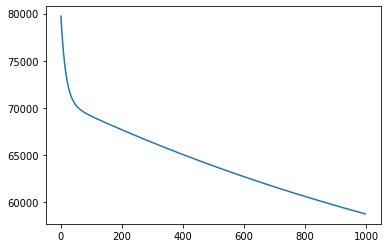

In [106]:
w = torch.randn(2, requires_grad=True)
b = torch.randn(1, requires_grad=True)

epochs = 1000
batch_size = 64
learning_rate = 0.01

losses = []

# write the training procedure
# --- YOUR CODE HERE ---
for epoch in range(epochs):
    ll = 0
    for i, batch in enumerate(generator(features, labels, batch_size)):
        #for X, y in generator(features, labels, batch_size):
        y_pred = lin_reg(X, w, b)
        batch_loss = mse_loss(y, y_pred)
        ll += batch_loss
        batch_loss.backward()
        sgd([w, b], learning_rate, len(X))
    losses.append(ll.item() / i) #average loss
        #print(batch_loss)
plt.plot(losses[2:])

In [107]:
w, b

(tensor([ 4.7987, 30.5786], requires_grad=True),
 tensor([167.7081], requires_grad=True))

In [108]:
true_w, true_b

(tensor([ 10., -20.]), 100.0)

### Normalize input data

It is usually better to normalize your input data to remove any scaling differences. The normalized data shall have zero mean $\mu$ and standard deviation $\sigma$ 1.
$$x_{norm} = \frac{x - \mu(x)}{\sigma(x)}$$

In [109]:
mn = features.mean(dim=0)
xn = features - mn
xn.mean(dim=0)

std = torch.std(xn, dim=0) #man kann std auch über features berechnen, ist das gleiche
xn = xn/std
xn.std(dim=0)

tensor([1., 1.])

### Plot data again

Just to check the result of the normalization step, plot again the scatter of price agains the normalized size.

In [110]:
# --- YOUR CODE HERE ---
#plt.scatter(xn.detach().numpy(), labels.detach().numpy(), .5)

### Train over normalized data

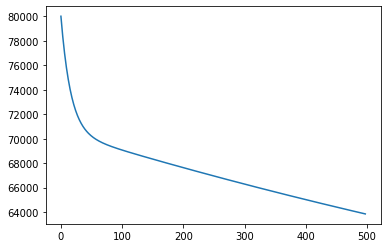

In [111]:
w = torch.randn(2, requires_grad=True)
b = torch.randn(1, requires_grad=True)

epochs = 500
batch_size = 64
learning_rate = 0.01

losses = []

# write the training procedure
# --- YOUR CODE HERE ---
for epoch in range(epochs):
    ll = 0
    for i, batch in enumerate(generator(xn, labels, batch_size)):
        #for X, y in generator(features, labels, batch_size):
        y_pred = lin_reg(X, w, b)
        batch_loss = mse_loss(y, y_pred)
        ll += batch_loss
        batch_loss.backward()
        sgd([w, b], learning_rate, len(X))
    losses.append(ll.item() / i) #average loss
        #print(batch_loss)
plt.plot(losses[2:])

In [112]:
# Wir brauchen viel weniger epochs

In [113]:
w, b

(tensor([ 5.5164, 35.1521], requires_grad=True),
 tensor([91.2353], requires_grad=True))

In [114]:
true_w, true_b

(tensor([ 10., -20.]), 100.0)